In [1]:
# dataset : https://www.kaggle.com/datasets/imbikramsaha/caltech-101
# model link : https://www.kaggle.com/datasets/keras/vgg16/

In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

2023-11-16 18:46:57.696914: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-16 18:46:57.748502: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-16 18:46:57.748524: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-16 18:46:57.749563: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-16 18:46:57.756891: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-16 18:46:57.757868: I tensorflow/core/platform/cpu_feature_guard.cc:1

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [4]:
dataset_dir = "/home/tanisha/DL/LP-IV-datasets/Object Detection(Ass6)/caltech-101-img" #Specifies the directory path where the dataset is located
dataset_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
)
#normalises the image

# # here batch_size is the number of images in each batch
batch_size = 2000
dataset_generator = dataset_datagen.flow_from_directory(
    dataset_dir,
    target_size=(64, 64), #resizes the image into 64 by 64 pixel
    batch_size=batch_size, #Sets the batch size for training.
    class_mode='categorical' # labels are one-hot encoded
)

Found 9144 images belonging to 102 classes.


In [5]:
x_train, y_train =  dataset_generator[0]
x_test, y_test = dataset_generator[1]

print(len(x_train))
print(len(x_test))

2000
2000


In [6]:

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam

In [7]:
from tensorflow.keras.applications import VGG16


In [8]:
weights_path = "/home/tanisha/DL/LP-IV-datasets/Object Detection(Ass6)/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5"
base_model = VGG16(weights=weights_path, include_top=False, input_shape=(64, 64, 3))

In [9]:

for layer in base_model.layers:
   layer.trainable = False

In [10]:
x = Flatten()(base_model.output)
# Explanation: This line adds a Flatten layer to the output of the base_model. The Flatten layer is used to transform the 3D tensor output from the convolutional base (which is usually the output of the last convolutional layer) into a 1D tensor. This flattening step is necessary when transitioning from convolutional layers to densely connected layers.
# Example: Suppose the output shape of base_model is (7, 7, 512). This means you have a 3D tensor with dimensions 7x7x512. Applying the Flatten layer converts this 3D tensor into a 1D tensor by unraveling the values along the dimensions. In this case, the resulting 1D tensor would have a size of 7 * 7 * 512 = 25088.
x = Dense(64, activation='relu')(x)
predictions = Dense(102, activation='softmax')(x)

# Create the model
model = Model(inputs=base_model.input, outputs=predictions)
# Compile the model
model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])

In [12]:
model.fit(x_train, y_train, batch_size=64, epochs=3, validation_data=(x_test, y_test))


Epoch 1/3
32/32 [==============================] - 57s 2s/step - loss: 3.5731 - accuracy: 0.2725 - val_loss: 3.2010 - val_accuracy: 0.3175
Epoch 2/3
32/32 [==============================] - 67s 2s/step - loss: 2.8255 - accuracy: 0.3955 - val_loss: 2.8489 - val_accuracy: 0.3980
Epoch 3/3
32/32 [==============================] - 63s 2s/step - loss: 2.3917 - accuracy: 0.4800 - val_loss: 2.5489 - val_accuracy: 0.4600


In [13]:
base_model = VGG16(weights=weights_path, include_top=False, input_shape=(64, 64, 3))
# freeze all layers first
for layer in base_model.layers:
   layer.trainable = False
# unfreeze last 4 layers of base model
for layer in base_model.layers[len(base_model.layers) - 2:]:
   layer.trainable = True
# fine-tuning hyper parameters
x = Flatten()(base_model.output)
x = Dense(512, activation='relu')(x)
x = tf.keras.layers.Dropout(0.3)(x)
predictions = Dense(102, activation='softmax')(x)

# Create the model
model = Model(inputs=base_model.input, outputs=predictions)
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
# training fine tuned model
model.fit(x_train, y_train, batch_size=64, epochs=5, validation_data=(x_test, y_test))

Epoch 1/5
32/32 [==============================] - 73s 2s/step - loss: 3.1273 - accuracy: 0.3605 - val_loss: 2.3991 - val_accuracy: 0.4695
Epoch 2/5
32/32 [==============================] - 67s 2s/step - loss: 1.8827 - accuracy: 0.5575 - val_loss: 1.9811 - val_accuracy: 0.5475
Epoch 3/5
32/32 [==============================] - 67s 2s/step - loss: 1.2042 - accuracy: 0.6885 - val_loss: 1.7114 - val_accuracy: 0.5960
Epoch 4/5
32/32 [==============================] - 57s 2s/step - loss: 0.7757 - accuracy: 0.7860 - val_loss: 1.6817 - val_accuracy: 0.6170
Epoch 5/5
32/32 [==============================] - 47s 1s/step - loss: 0.5188 - accuracy: 0.8590 - val_loss: 1.6743 - val_accuracy: 0.6165


In [14]:
import matplotlib.pyplot as plt
predicted_value = model.predict(x_test)

63/63 [==============================] - 22s 349ms/step


In [15]:
labels = list(dataset_generator.class_indices.keys())


Preditcted:  schooner
Actual:  ketch


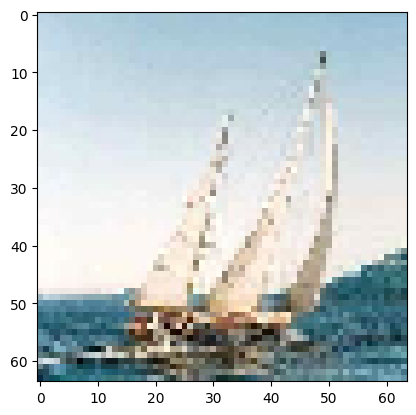

In [16]:
n = 887

plt.imshow(x_test[n])
print("Preditcted: ",labels[np.argmax(predicted_value[n])])
print("Actual: ", labels[np.argmax(y_test[n])])